In [25]:
import json
import re
from konlpy.tag import Okt
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud

In [26]:
# 한글 폰트 다운로드
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [13]:
# 구글 코랩에서 '내 드라이브' 경로 지정을 위한 코드입니다. 모두 허용으로 하시면 됩니다.
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [15]:
inputFileName = '/content/gdrive/My Drive/졸음운전_naver_news' # 이거는 네이버 기사 크롤링에서 저장한 json 파일 이름입니다. json파일이랑 지금 ipynb파일을 같은 폴더에 놔주세용!
data = json.loads(open(inputFileName+'.json','r', encoding = 'utf-8').read())
data

[{'cnt': 1,
  'description': '다른 버스에 탄 승객 7명도 부상을 입고 인근 병원으로 옮겨졌습니다. 경찰은 편도 1차로에서 버스를 몰던 A 씨가 <b>졸음운전</b>이나 부주의로 사고를 냈을 가능성이 있는 것으로 보고 정확한 경위를 조사를 하고 있습니다.',
  'pDate': '2021-12-16 19:58:00',
  'title': '인천공항 출국장 진입로 버스 간 추돌…9명 부상'},
 {'cnt': 2,
  'description': '경찰은 편도 1차로에서 버스를 몰던 A씨가 <b>졸음운전</b>이나 부주의로 사고를 냈을 가능성이 있는 것으로 보고 정확한 경위를 조사 중. ◆옵티머스 관계사 전 대표 법정구속...2심 징역 3년 6개월 펀드 사기 사건으로... ',
  'pDate': '2021-12-16 18:02:00',
  'title': '[금일 사건사고 주요기사]&quot;불법도박 의혹&quot; 가세연, 이재명 장남 고발....&quot;강제...'},
 {'cnt': 3,
  'description': '당시 앞 버스에는 승객이 없었으며 기사도 별다른 부상을 입지 않은 것으로 파악됐습니다.경찰은 편도 1차로에서 버스를 몰던 A씨가 <b>졸음운전</b>이나 부주의로 사고를 냈을 가능성이 있는 것으로 보고 정확한 경위를... ',
  'pDate': '2021-12-16 18:02:00',
  'title': '인천공항 출국장 진입로서 버스끼리 추돌…9명 부상'},
 {'cnt': 4,
  'description': '버스에는 승객이 없었고 운전기사도 크게 다치지 않은 것으로 알려졌습니다. 경찰은 뒤따르던 버스 운전기사가 <b>졸음운전</b>이나 전방주시 태만으로 사고를 낸 것으로 보고 치료를 마치는 대로 기사를 불러 조사할 예정입니다.',
  'pDate': '2021-12-16 17:27:00',
  'title': '인천공항 진입로서 버스 추돌 사고...9명 다쳐 병원 이송'},
 {'cnt': 5,
  'desc

In [18]:
# 키값으로 description을 이용하는 코드입니다.
description = ''
for item in data:
  if 'description' in item.keys():
    description = description + re.sub(r'[^\w]', ' ', item['description']) + ''

description

'다른 버스에 탄 승객 7명도 부상을 입고 인근 병원으로 옮겨졌습니다  경찰은 편도 1차로에서 버스를 몰던 A 씨가  b 졸음운전  b 이나 부주의로 사고를 냈을 가능성이 있는 것으로 보고 정확한 경위를 조사를 하고 있습니다 경찰은 편도 1차로에서 버스를 몰던 A씨가  b 졸음운전  b 이나 부주의로 사고를 냈을 가능성이 있는 것으로 보고 정확한 경위를 조사 중   옵티머스 관계사 전 대표 법정구속   2심 징역 3년 6개월 펀드 사기 사건으로    당시 앞 버스에는 승객이 없었으며 기사도 별다른 부상을 입지 않은 것으로 파악됐습니다 경찰은 편도 1차로에서 버스를 몰던 A씨가  b 졸음운전  b 이나 부주의로 사고를 냈을 가능성이 있는 것으로 보고 정확한 경위를    버스에는 승객이 없었고 운전기사도 크게 다치지 않은 것으로 알려졌습니다  경찰은 뒤따르던 버스 운전기사가  b 졸음운전  b 이나 전방주시 태만으로 사고를 낸 것으로 보고 치료를 마치는 대로 기사를 불러 조사할 예정입니다 경찰에 따르면 사고 당시 A씨에게 술냄새는 나지 않은 것으로 확인됐다  경찰은  b 졸음운전  b 이나 부주의 사고 가능성을 두고 A씨와 승객들을 상대로 정확한 사고 경위를 조사할 계획이다 기사도 별다른 부상을 입지 않은 것으로 파악됐습니다  경찰은 버스를 몰던 A씨가  b 졸음운전  b 이나 부주의로 사고를 냈을 가능성이 있는 것으로 보고 정확한 경위를 조사하고 있습니다   사진 출처   인천소방본부 제공 중상을 입었으며  다른 승객 7명도 부상을 입고 인근 병원으로 옮겨져 치료를 받고 있습니다  경찰은 운전기사가  b 졸음운전  b 을 하거나 전방을 제대로 살피지 못해 사고를 낸 것으로 보고  정확한 경위를 조사하고 있습니다 이 사고로 A 씨와 50대 여성 승객이 크게 다치는 등 모두 9명이 다쳐 병원으로 이송됐습니다  경찰은 A 씨가 병원 치료를 마치는 대로 음주운전이나  b 졸음운전  b  여부를 확인하는 등 정확한 사고 경위를 조사할 방침입니다 경찰은 편도 1차로에서 버

In [20]:
nlp = Okt()
des_N = nlp.nouns(description)
des_N

['다른',
 '버스',
 '승객',
 '명도',
 '부상',
 '인근',
 '병원',
 '경찰',
 '편도',
 '차로',
 '버스',
 '몰던',
 '씨',
 '졸음',
 '운전',
 '이나',
 '부주의',
 '사고',
 '가능성',
 '것',
 '보고',
 '경위',
 '조사',
 '경찰',
 '편도',
 '차로',
 '버스',
 '몰던',
 '씨',
 '졸음',
 '운전',
 '이나',
 '부주의',
 '사고',
 '가능성',
 '것',
 '보고',
 '경위',
 '조사',
 '중',
 '옵티머스',
 '관계',
 '사',
 '전',
 '대표',
 '법정구속',
 '심',
 '징역',
 '개월',
 '펀드',
 '사기',
 '사건',
 '당시',
 '앞',
 '버스',
 '승객',
 '기사도',
 '부상',
 '입지',
 '것',
 '파악',
 '경찰',
 '편도',
 '차로',
 '버스',
 '몰던',
 '씨',
 '졸음',
 '운전',
 '이나',
 '부주의',
 '사고',
 '가능성',
 '것',
 '보고',
 '경위',
 '버스',
 '승객',
 '운전기사',
 '크게',
 '것',
 '경찰',
 '버스',
 '운전기사',
 '졸음',
 '운전',
 '이나',
 '전방',
 '주시',
 '태만',
 '사고',
 '것',
 '보고',
 '치료',
 '대로',
 '기사',
 '조사',
 '예정',
 '경찰',
 '사고',
 '당시',
 '씨',
 '술',
 '냄새',
 '것',
 '확인',
 '경찰',
 '졸음',
 '운전',
 '이나',
 '부주의',
 '사고',
 '가능성',
 '씨',
 '승객',
 '상대로',
 '사고',
 '경위',
 '조사',
 '계획',
 '기사도',
 '부상',
 '입지',
 '것',
 '파악',
 '경찰',
 '버스',
 '몰던',
 '씨',
 '졸음',
 '운전',
 '이나',
 '부주의',
 '사고',
 '가능성',
 '것',
 '보고',
 '경위',
 '조사',
 '사진',
 '출처',
 '인천',
 '소방본부

In [22]:
count = Counter(des_N)
count

Counter({'다른': 15,
         '버스': 64,
         '승객': 25,
         '명도': 5,
         '부상': 18,
         '인근': 21,
         '병원': 51,
         '경찰': 189,
         '편도': 4,
         '차로': 11,
         '몰던': 9,
         '씨': 155,
         '졸음': 1145,
         '운전': 1253,
         '이나': 38,
         '부주의': 54,
         '사고': 567,
         '가능성': 34,
         '것': 229,
         '보고': 79,
         '경위': 81,
         '조사': 128,
         '중': 97,
         '옵티머스': 1,
         '관계': 1,
         '사': 7,
         '전': 43,
         '대표': 37,
         '법정구속': 1,
         '심': 10,
         '징역': 1,
         '개월': 2,
         '펀드': 1,
         '사기': 4,
         '사건': 3,
         '당시': 25,
         '앞': 21,
         '기사도': 4,
         '입지': 2,
         '파악': 19,
         '운전기사': 18,
         '크게': 11,
         '전방': 17,
         '주시': 26,
         '태만': 31,
         '치료': 20,
         '대로': 8,
         '기사': 62,
         '예정': 38,
         '술': 25,
         '냄새': 3,
         '확인': 31,
         '상대로': 17

In [23]:
word_count = dict()
for tag, counts in count.most_common(80):
  if(len(str(tag)) >1 ):
    word_count[tag] = counts
    print('%s : %d' % (tag, counts)) 

운전 : 1253
졸음 : 1145
사고 : 567
안전 : 317
운전자 : 301
예방 : 265
화물차 : 208
차량 : 198
고속도로 : 197
시스템 : 197
경찰 : 189
휴식 : 158
교통사고 : 132
발생 : 129
조사 : 128
도로공사 : 118
교통 : 118
방지 : 118
위해 : 103
관계자 : 102
운행 : 102
화물 : 98
한국 : 92
기술 : 92
휴게소 : 90
경우 : 90
주차 : 86
경위 : 81
보고 : 79
원인 : 78
제공 : 75
기능 : 75
서비스 : 75
물류 : 73
감지 : 72
과속 : 72
티맵 : 69
피로 : 66
버스 : 64
도로 : 64
기사 : 62
사망자 : 58
장거리 : 58
부주의 : 54
음주 : 53
센서 : 53
최근 : 52
주행 : 52
활용 : 52
운임 : 52
병원 : 51
모빌리티 : 50
이용 : 49
연구소 : 49
통해 : 49
경고 : 48
시행 : 48
뇌파 : 48
터널 : 47
연휴 : 47


In [27]:
font_path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
matplotlib.rc('font', family = font_name)

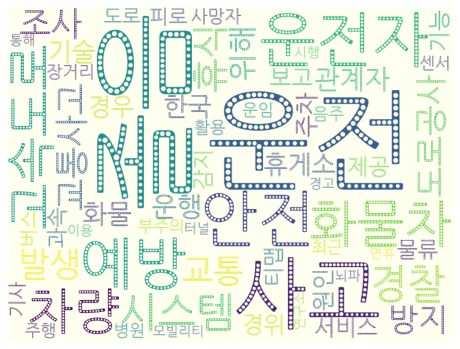

In [28]:
wc = WordCloud(font_path, background_color = 'ivory', width = 800, height = 600)
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize = (8, 8))
plt.imshow(cloud)
plt.axis('off')
plt.show()